# Naive Bayes

Consider a multiclass classification task where the predictors $x_1, \ldots, x_n$ are conditionally independent of each other. Under the naive bayes assumption, the bayes theorem simplifies to
$$
p(C_{k} \mid \mathbf x)={\frac {p(C_{k})}{p(\mathbf x)}} \prod _{{i=1}}^{n} p(x_{i} \mid C_{k})
$$
for each of the $K$ possible classes $\{C_k\}$. The resulting classifier which assigns the variable $\hat c$ to the class that maximizes this probability is known as the naive bayes classifier,
$$
\hat c = \underset {C_k}{\arg\max} \ p(C_{k}) \prod _{i=1}^n p(x_{i} \mid C_{k}).
$$

## Gaussian Naive Bayes

The gaussian naive bayes algorithm assumes the likelihood of the features follow a Normal distribution:
$$
p(x_i \mid c) = \frac{1}{\sqrt{2\pi\sigma^2_c}} \exp \left(-\frac{(x_i - \mu_c)^2}{2 \sigma^2_c}\right)
$$
The parameters $\mu_c$ and $\sigma_c$ are estimated using maximum likelihood.

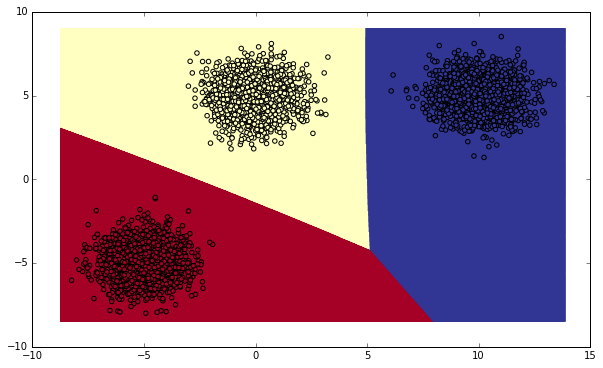

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

n_samples = 5000
centers = [(-5, -5), (0, 5), (10, 5)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)

clf = GaussianNB()
clf.fit(X, y)

# plot the decision surface
h = .01
colors = plt.cm.RdYlBu
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
y_grid_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
plt.figure(figsize=(10, 6))
plt.pcolormesh(xx, yy, y_grid_pred.reshape(xx.shape), cmap=colors, alpha=0.25)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors)
#plt.legend(loc="lower right")

## Bernoulli Naive Bayes

In this variant of the NB model, the features are assumed to be independent boolean variables distributed according to a Bernoulli distribution:
$$
p(x_i \mid C_k) = p_{{ik}}^{{x_{i}}} \, (1-p_{{ik}})^{{(1-x_{i})}},
$$
where $p_{ik} = p(x_i = 1 \mid C_k)$.

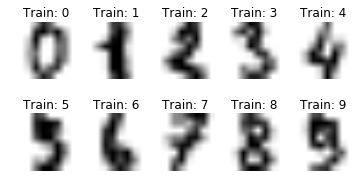

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
%matplotlib inline

digits = load_digits()

images_and_labels = list(zip(digits.images, digits.target))
plt.figure(figsize=(6, 3))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='bilinear')
    plt.title('Train: %i' % label)    

In [3]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.cross_validation import cross_val_score

n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

nb = BernoulliNB(binarize=np.max(X)/2)
score = np.mean(cross_val_score(nb, X, y, scoring='accuracy', cv=5))
print('CV accuracy:', score)

CV accuracy: 0.860246827098


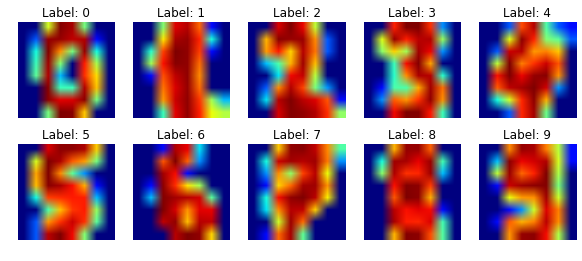

In [4]:
nb.fit(X, y)
plt.figure(figsize=(10, 4))
prob_images = nb.feature_log_prob_.reshape((-1,) + digits.images.shape[1:])
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(prob_images[i,:], interpolation='bilinear')
    plt.axis('off')
    plt.title('Label: %i' % digits['target_names'][i])